In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings

# Use the warnings module to filter or suppress specific warning types
warnings.filterwarnings("ignore")  # This suppresses all warnings

In [149]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = "C:/Users/wwway/Downloads/prediction-of-TGV-delays-main/prediction-of-TGV-delays-main"
relative_path = 'dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
data = pd.read_csv(csv_path, delimiter=";")
gares_info = pd.read_csv("C:/Users/wwway/Downloads/liste-des-gares.csv", delimiter=";")
gares_frequentation = pd.read_csv("C:/Users/wwway/Downloads/frequentation-gares.csv", delimiter=";")
infos_rf = pd.read_csv("C:/Users/wwway/Downloads/at-taux.csv", delimiter=",")
print(data.head(6))
# Transformer lea colonne date en datetime
df = data
df["date"]= pd.to_datetime(df["date"])

      date   service         gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE            141   
1  2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE            165   
2  2018-01  National  PARIS MONTPARNASSE              QUIMPER            220   
3  2018-01  National  PARIS MONTPARNASSE              ST MALO            156   
4  2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS             61   
5  2018-01  National             QUIMPER   PARIS MONTPARNASSE            223   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             870              5                     NaN   
1             222              0                     NaN   
2             248              1                     NaN   
3             102              0                     NaN   
4             391              2                     NaN   
5             256              1                     NaN   

   nb_train_depart

Nombre de trajets en arrivée à la gare Paris Nord

In [162]:
df[df["gare_arrivee"]=="PARIS NORD"].count()

date                                    264
service                                 264
gare_depart                             264
gare_arrivee                            264
duree_moyenne                           264
nb_train_prevu                          264
nb_annulation                           264
commentaire_annulation                    0
nb_train_depart_retard                  264
retard_moyen_depart                     264
retard_moyen_tous_trains_depart         264
commentaire_retards_depart                0
nb_train_retard_arrivee                 264
retard_moyen_arrivee                    264
retard_moyen_tous_trains_arrivee        264
commentaires_retard_arrivee              29
nb_train_retard_sup_15                  264
retard_moyen_trains_retard_sup15        264
nb_train_retard_sup_30                  264
nb_train_retard_sup_60                  264
prct_cause_externe                      264
prct_cause_infra                        264
prct_cause_gestion_trafic       

transformer la colonne date en DateTime

In [7]:
infos_rf.rename(columns={"Mois":"date"},inplace=True)
infos_rf["date"]= pd.to_datetime(infos_rf["date"])

Description de la dataset :

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  8154 non-null   datetime64[ns]
 1   service                               8154 non-null   object        
 2   gare_depart                           8154 non-null   object        
 3   gare_arrivee                          8154 non-null   object        
 4   duree_moyenne                         8154 non-null   int64         
 5   nb_train_prevu                        8154 non-null   int64         
 6   nb_annulation                         8154 non-null   int64         
 7   commentaire_annulation                0 non-null      float64       
 8   nb_train_depart_retard                8154 non-null   int64         
 9   retard_moyen_depart                   8154 non-null   float64       
 10  

Fusionner notre dataset source avec les nouvelles données qu'on a trouvé sur les absences et le nombre d'accidents en réseau ferroviaire/TGV

In [8]:

merged_data = pd.merge(data, infos_rf, on='date', how='inner')
merged_data



,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,Nombre Accidents,Nombre de jours d'absences,TF mensuel,TF annuel glissant 12 mois,TG mensuel,TG annuel glissant 12 mois
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,10.924370,15.966387,5.042017,0.840336,374,16806,19.54,18.140691,0.88,0.89
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,38.461538,11.538462,3.846154,0.000000,374,16806,19.54,18.140691,0.88,0.89
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,15.384615,19.230769,0.000000,0.000000,374,16806,19.54,18.140691,0.88,0.89
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,7.692308,15.384615,7.692308,0.000000,374,16806,19.54,18.140691,0.88,0.89
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,9.090909,21.212121,6.060606,0.000000,374,16806,19.54,18.140691,0.88,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,...,55.238095,18.095238,7.619048,5.714286,284,17531,15.70,13.655559,0.97,1.00
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,...,8.333333,19.444444,8.333333,16.666667,284,17531,15.70,13.655559,0.97,1.00
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,...,28.571429,21.428571,3.571429,10.714286,284,17531,15.70,13.655559,0.97,1.00
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,...,27.586207,7.758621,7.758621,10.344828,284,17531,15.70,13.655559,0.97,1.00


In [64]:
# Convert both columns to lowercase for a case-insensitive comparison
data['gare_depart_lower'] = data['gare_depart'].str.lower()
gares_frequentation['Nom de la gare_lower'] = gares_frequentation['Nom de la gare'].str.lower()

# Filter and update the 'gares_frequentation' DataFrame
filtered_gares_frequentation = gares_frequentation[gares_frequentation['Nom de la gare_lower'].isin(data['gare_depart_lower'])]

# Replace the 'Nom de la gare' column with the original case-sensitive names from 'data'
filtered_gares_frequentation['Nom de la gare'] = filtered_gares_frequentation['Nom de la gare_lower'].apply(lambda x: data['gare_depart'].loc[data['gare_depart_lower'] == x].values[0])

# Remove the lowercase columns, if needed
filtered_gares_frequentation = filtered_gares_frequentation.drop(columns=['Nom de la gare_lower'])

# Now, 'filtered_gares_frequentation' contains only the rows with station names from 'data' and updated names.
print(f"On a pas d'informations sur ",len([f for f  in data['gare_depart'].unique() if f not in filtered_gares_frequentation["Nom de la gare"].unique()]), " sur ",len(data['gare_depart_lower'].unique()), " gares TGV")
try :
    data= data.drop(columns=['gare_depart_lower'])
except: pass


On a pas d'informations sur  10  sur  59  gares TGV


C:\Users\wwway\AppData\Local\Temp\ipykernel_2092\3234067399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gares_frequentation['Nom de la gare'] = filtered_gares_frequentation['Nom de la gare_lower'].apply(lambda x: data['gare_depart'].loc[data['gare_depart_lower'] == x].values[0])


# Ajouter les données de fréquentation à notre dataset 


In [ ]:
passenger_data = filtered_gares_frequentation
data = merged_data
# Pour chaque année dans notre dataset on va ajouter les informations sur la fréquentation des passagers
# Cependant notre passenger_data ne contient pas les informations sur l'année 2023
for annee in ["2018", "2019", "2020", "2021", "2022"]:
    # Fusionner les données des voyageurs pour 'Total Voyageurs' pour l'année spécifiée
    data['Total Voyageurs ' + annee] = data.apply(
        lambda ligne: passenger_data[
            (passenger_data['Nom de la gare'] == ligne['gare_depart'])][f'Total Voyageurs {annee}'].values[0]
        if not passenger_data[(passenger_data['Nom de la gare'] == ligne['gare_depart'])].empty
        else None, axis=1
    )

    # Fusionner les données des voyageurs pour 'Total Voyageurs + Non voyageurs' pour l'année spécifiée
    data['Total Voyageurs + Non voyageurs ' + annee] = data.apply(
        lambda ligne: passenger_data[
            (passenger_data['Nom de la gare'] == ligne['gare_depart'])][f'Total Voyageurs + Non voyageurs {annee}'].values[0]
        if not passenger_data[(passenger_data['Nom de la gare'] == ligne['gare_depart'])].empty
        else None, axis=1
    )

# Afficher les premières lignes des données
data.head()


In [86]:

data.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard',
       'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15',
       'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
       'Total Voyageurs annuel', 'Total Voyageurs + non voyageurs annuel'],
      dtype='object')

In [83]:
data["Total Voyageurs annuel"] = np.nan
data["Total Voyageurs + non voyageurs annuel"] = np.nan

for i, row in data.iterrows():
    year = row["date"].year
    if year < 2023:
        data.at[i, "Total Voyageurs annuel"] = row["Total Voyageurs " + str(year)]
        data.at[i, "Total Voyageurs + non voyageurs annuel"] = row["Total Voyageurs + Non voyageurs " + str(year)]
# Drop non necessary columns

data.drop(['Total Voyageurs 2018',
       'Total Voyageurs + Non voyageurs 2018', 'Total Voyageurs 2019',
       'commentaire_annulation', 
       'commentaires_retard_arrivee',
       'commentaire_retards_depart',
       'Total Voyageurs + Non voyageurs 2019', 'Total Voyageurs 2020',
       'Total Voyageurs + Non voyageurs 2020', 'Total Voyageurs 2021',
       'Total Voyageurs + Non voyageurs 2021', 'Total Voyageurs 2022',
       'Total Voyageurs + Non voyageurs 2022'], axis=1, inplace=True)

In [87]:
#Enregistrer la nouvelle dataset_merged
data.to_csv('dataset_merged.csv', index=False) 

In [142]:
# La dernière date dans notre dataset
data["date"].max()

Timestamp('2023-06-01 00:00:00')

In [30]:
# Transformer les datetime en période
df = data
df["date"]= pd.to_datetime(df["date"])
df['month_year'] = df['date'].dt.to_period('M')
df

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,...,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,Total Voyageurs annuel,Total Voyageurs + non voyageurs annuel,month_year
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,289,11.247809,3.693179,...,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,16080989.0,19853073.0,2018-01
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,...,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,1984267.0,2511730.0,2018-01
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,37,9.501351,1.003981,...,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,59174533.0,73296351.0,2018-01
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,12,19.912500,1.966667,...,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,59174533.0,73296351.0,2018-01
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,61,7.796995,0.886889,...,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,59174533.0,73296351.0,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,273,11.989927,6.742041,...,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286,NaN,NaN,2023-06
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,24,28.730556,3.181240,...,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667,NaN,NaN,2023-06
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,20,31.281667,3.276353,...,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286,NaN,NaN,2023-06
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,347,13.517051,10.271499,...,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828,NaN,NaN,2023-06


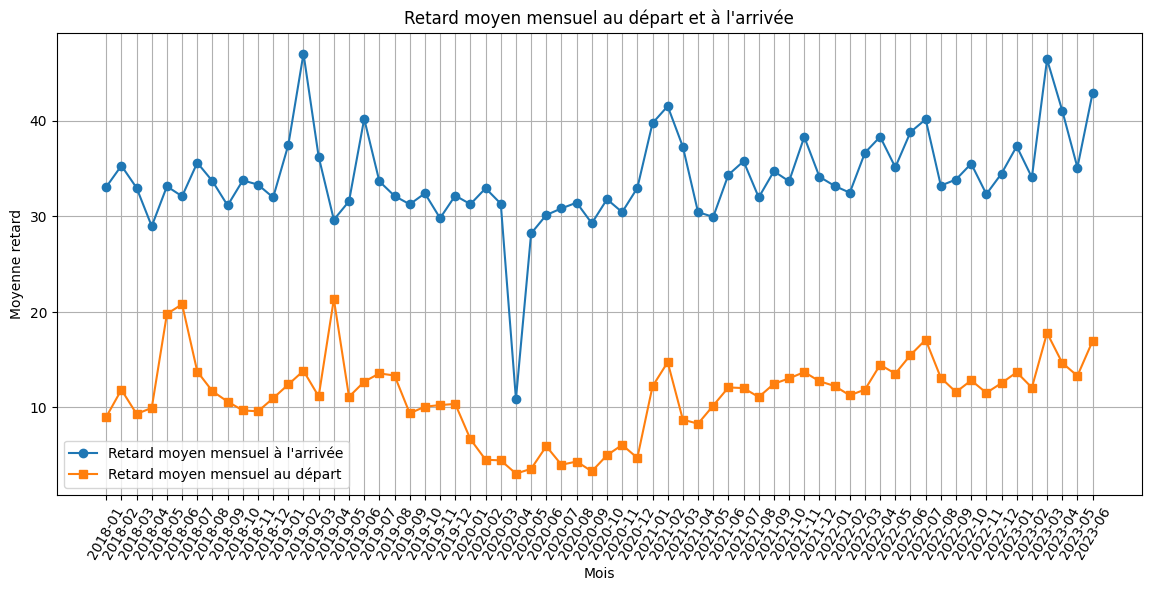

In [30]:
df= data.copy()

# Convert the "date" column to a datetime object with format 'YYYY-MM'
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')


# Group the data by month, calculate the average arrival and departure delays for each month
monthly_mean_arrival_delay = df.groupby(df['date'].dt.to_period('M'))['retard_moyen_arrivee'].mean()
monthly_mean_departure_delay = df.groupby(df['date'].dt.to_period('M'))['retard_moyen_depart'].mean()

# Create an integer range for the x-axis based on the number of data points
x = range(len(monthly_mean_arrival_delay))

# Plot the data on the same plot
plt.figure(figsize=(14, 6))
plt.plot(x, monthly_mean_arrival_delay, label="Retard moyen mensuel à l'arrivée", marker='o')
plt.plot(x, monthly_mean_departure_delay, label='Retard moyen mensuel au départ', marker='s')
plt.title("Retard moyen mensuel au départ et à l'arrivée")
plt.xlabel('Mois')
plt.ylabel('Moyenne retard')
plt.legend()

# Set the x-axis ticks and labels
plt.xticks(x, [d.strftime('%Y-%m') for d in monthly_mean_arrival_delay.index], rotation=60)

plt.grid(True)
plt.show()

In [ ]:
df[df['nb_train_depart_retard'] > 0].groupby('gare_depart')['nb_train_depart_retard'].mean()

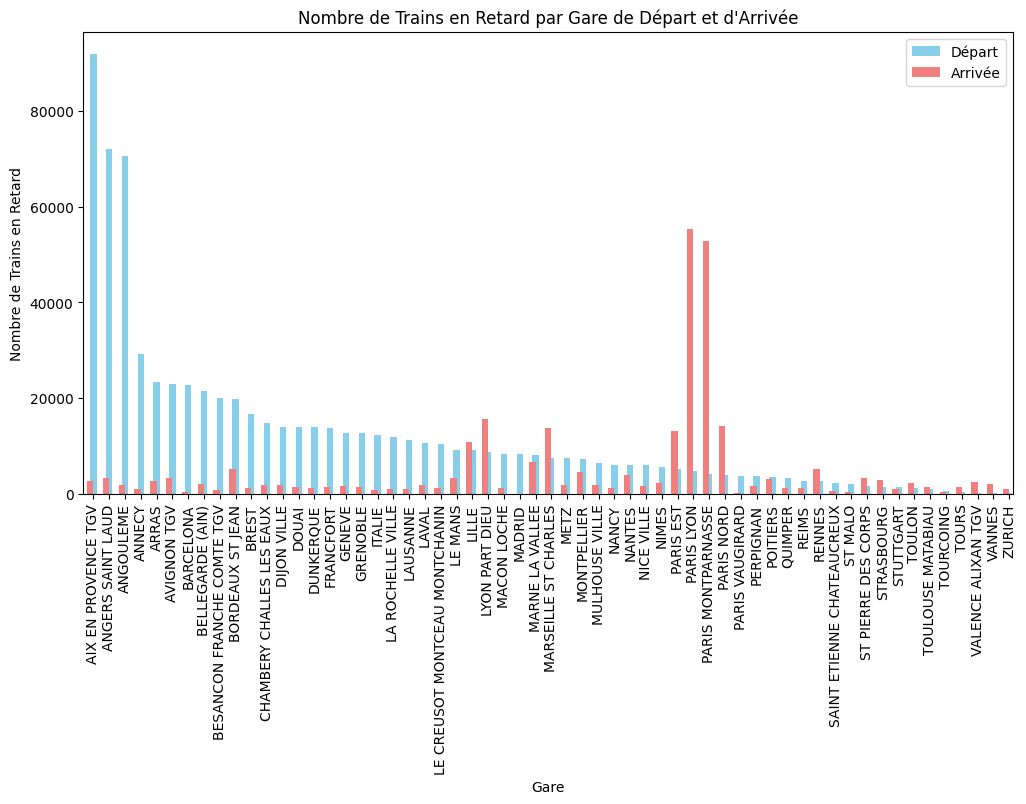

In [163]:
# Grouper par "gare_depart" et compter le nombre de trains en retard au départ
nombre_trains_retard_depart = df[df['nb_train_depart_retard'] > 0].groupby('gare_depart')['nb_train_depart_retard'].sum()

# Grouper par "gare_arrivee" et compter le nombre de trains en retard à l'arrivée
nombre_trains_retard_arrivee = df[df['nb_train_retard_arrivee'] > 0].groupby('gare_arrivee')['nb_train_retard_arrivee'].sum()

# Triez les gares par le nombre de trains en retard au départ, en ordre décroissant
nombre_trains_retard_depart = nombre_trains_retard_depart.sort_values(ascending=False)

# Créez un graphique en barres
plt.figure(figsize=(12, 6))

# Créez un petit décalage entre les deux barres
width = 0.4

nombre_trains_retard_depart.plot(kind='bar', color='skyblue', label='Départ', width=width)
nombre_trains_retard_arrivee.plot(kind='bar', color='lightcoral', label='Arrivée', width=width, position=1)

plt.title('Nombre de Trains en Retard par Gare de Départ et d\'Arrivée')
plt.xlabel('Gare')
plt.ylabel('Nombre de Trains en Retard')

# Rotation des étiquettes de l'axe des x de 90 degrés
plt.xticks(rotation=90)

# Ajoutez une légende pour distinguer les données de départ et d'arrivée
plt.legend()

plt.show()

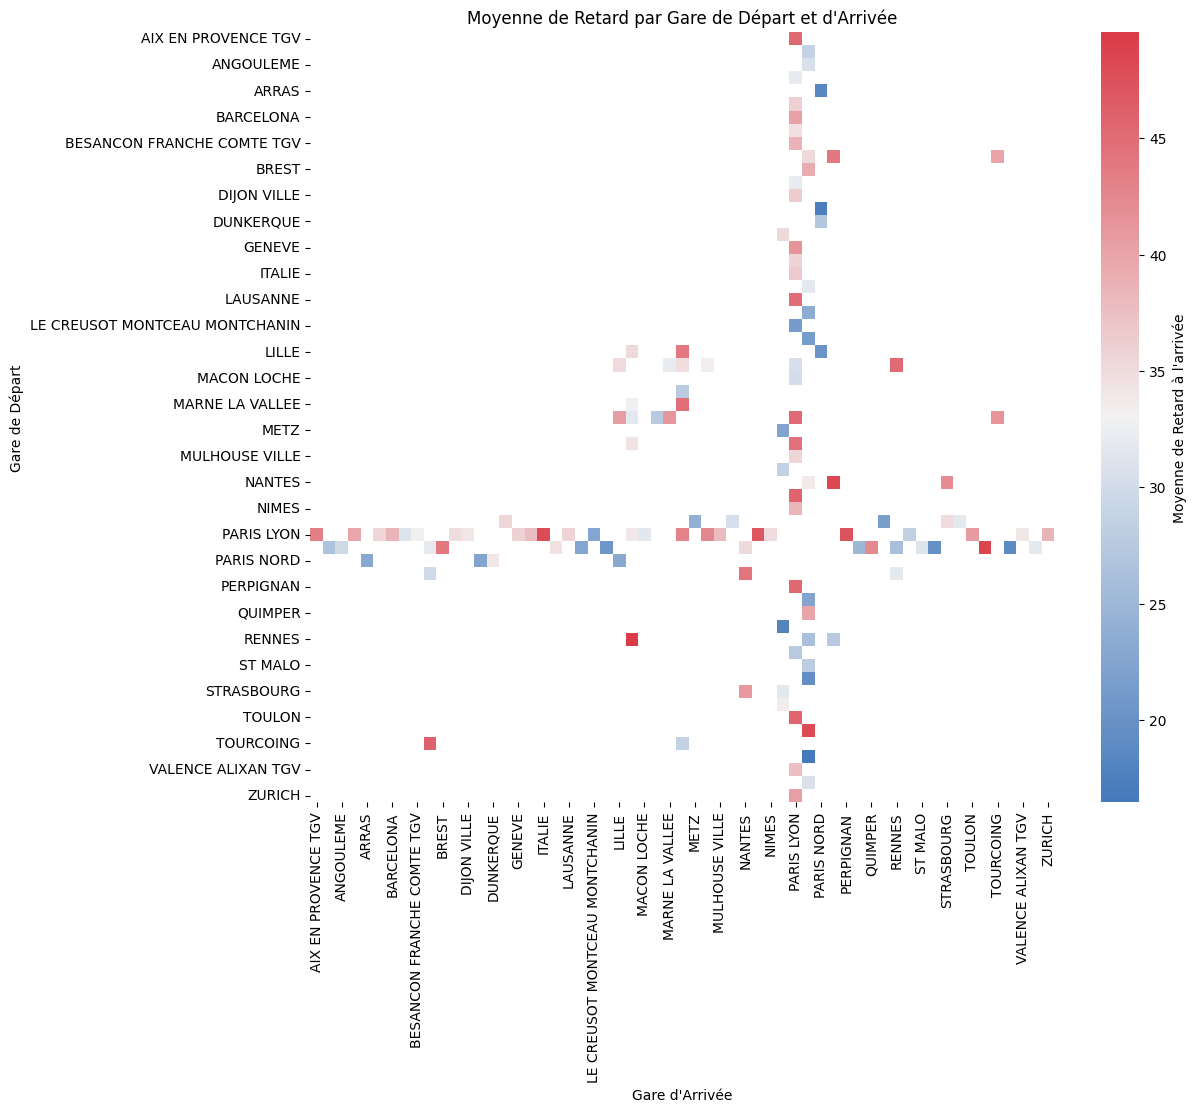

In [ ]:
# Pivot the DataFrame to create a matrix of average delays
pivot_df = df.pivot_table(index='gare_depart', columns='gare_arrivee', values='retard_moyen_arrivee', aggfunc='mean')
stom_cmap = sns.diverging_palette(250, 10, as_cmap=True)
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, cmap=stom_cmap, fmt=".1f", cbar_kws={'label': "Moyenne de Retard à l'arrivée"})
# sns.heatmap(pivot_df, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': "Moyenne de Retard à l'arrivée"})
plt.title('Moyenne de Retard par Gare de Départ et d\'Arrivée')
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Gare de Départ')

plt.show()

C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\1546660234.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(gares, rotation=90)


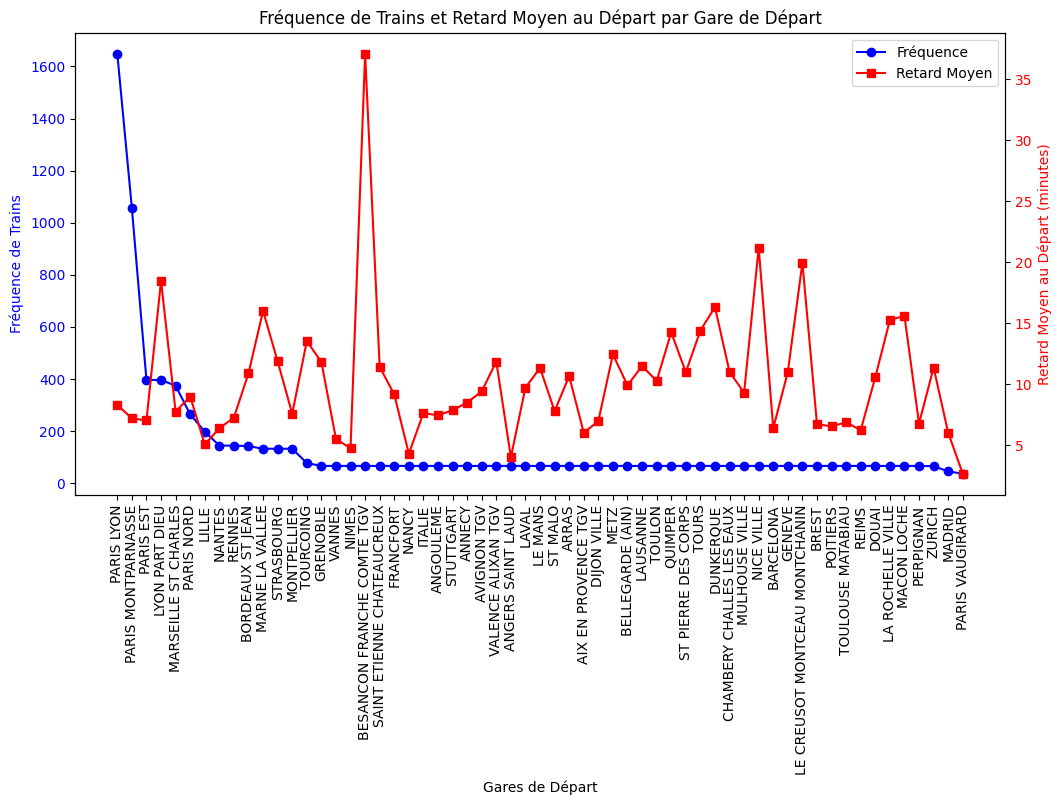

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle "df"

# Comptez le nombre d'instances par gare de départ
frequence_gare_depart = df['gare_depart'].value_counts()

# Groupez par "gare_depart" et calculez la moyenne du retard au départ
retard_moyen_depart = df.groupby('gare_depart')['retard_moyen_depart'].mean()

# Créez une liste d'abscisses (gares de départ)
gares = frequence_gare_depart.index

# Créez un graphique à deux axes Y distincts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracez la première ligne pour la fréquence sur l'axe des Y1
ax1.plot(gares, frequence_gare_depart, color='b', marker='o', label='Fréquence')
ax1.set_xlabel('Gares de Départ')
ax1.set_ylabel('Fréquence de Trains', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créez un deuxième axe Y pour le retard moyen
ax2 = ax1.twinx()
ax2.plot(gares, retard_moyen_depart, color='r', marker='s', label='Retard Moyen')
ax2.set_ylabel('Retard Moyen au Départ (minutes)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Fréquence de Trains et Retard Moyen au Départ par Gare de Départ')

# Ajoutez une légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Ajoutez cette ligne pour faire pivoter les noms des gares de 90 degrés
ax1.set_xticklabels(gares, rotation=90)

plt.show()


C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\1795640459.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(gares_arrivee, rotation=90)


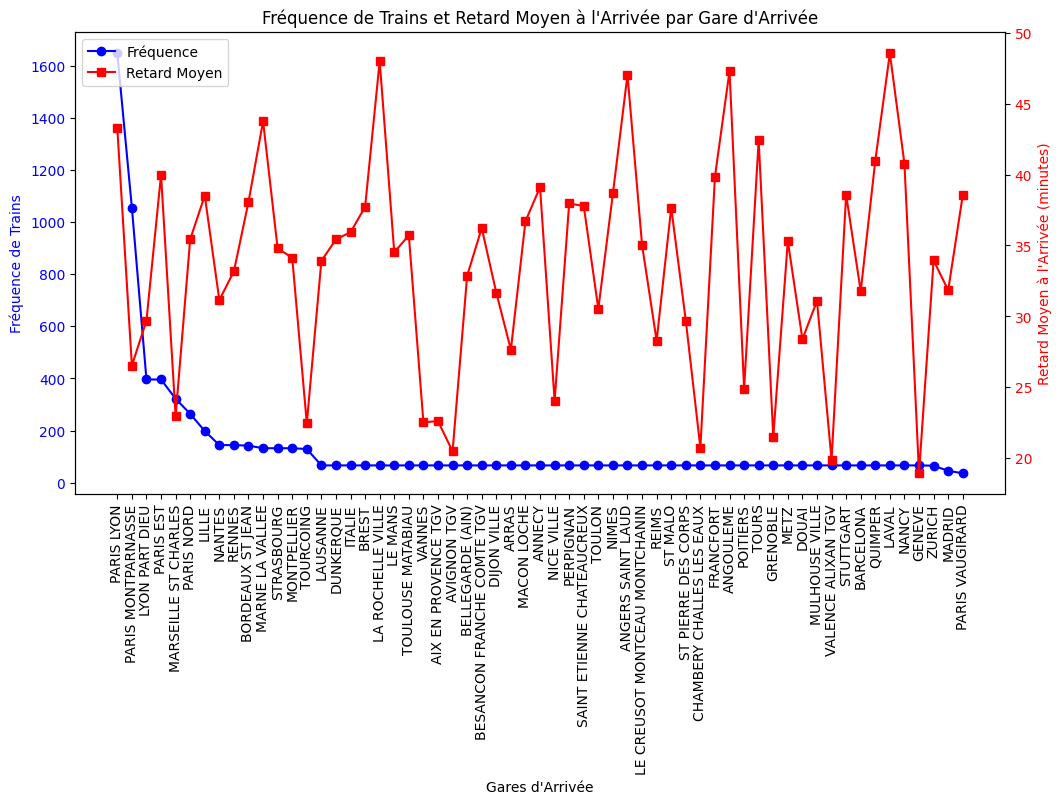

In [ ]:

# Comptez le nombre d'instances par gare d'arrivée
frequence_gare_arrivee = df['gare_arrivee'].value_counts()

# Groupez par "gare_arrivee" et calculez la moyenne du retard à l'arrivée
retard_moyen_arrivee = df.groupby('gare_arrivee')['retard_moyen_arrivee'].mean()

# Créez une liste d'abscisses (gares d'arrivée)
gares_arrivee = frequence_gare_arrivee.index

# Créez un graphique à deux axes Y distincts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracez la première ligne pour la fréquence sur l'axe des Y1
ax1.plot(gares_arrivee, frequence_gare_arrivee, color='b', marker='o', label='Fréquence')
ax1.set_xlabel('Gares d\'Arrivée')
ax1.set_ylabel('Fréquence de Trains', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créez un deuxième axe Y pour le retard moyen à l'arrivée
ax2 = ax1.twinx()
ax2.plot(gares_arrivee, retard_moyen_arrivee, color='r', marker='s', label='Retard Moyen')
ax2.set_ylabel('Retard Moyen à l\'Arrivée (minutes)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Fréquence de Trains et Retard Moyen à l\'Arrivée par Gare d\'Arrivée')

# Ajoutez une légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Ajoutez cette ligne pour faire pivoter les noms des gares d'arrivée de 90 degrés
ax1.set_xticklabels(gares_arrivee, rotation=90)

plt.show()

In [ ]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = data['retard_moyen_arrivee'].groupby(data['gare_depart']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean',ascending=False)
global_stats

,min,max,count,mean
gare_depart,,,,
TOULOUSE MATABIAU,20.683333,92.334783,66.0,48.006583
NICE VILLE,0.000000,75.144203,66.0,45.802248
TOULON,0.000000,71.945333,66.0,45.550346
AIX EN PROVENCE TGV,23.983333,89.785714,66.0,45.390239
PERPIGNAN,0.000000,80.692949,66.0,45.310804
LAUSANNE,0.000000,112.687500,66.0,44.899500
TOURCOING,0.000000,299.600000,77.0,43.070961
GENEVE,0.000000,88.898810,66.0,41.519903
ZURICH,0.000000,147.716667,65.0,40.407253


C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\2981846498.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['Catégorie de Retard'] = df_filtre['retard_moyen_arrivee'].apply(categoriser_retard)
C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\2981846498.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df_filtre, y='gare_depart', hue='Catégorie de Retard', order=top_10_gares_depart, palette=palette)


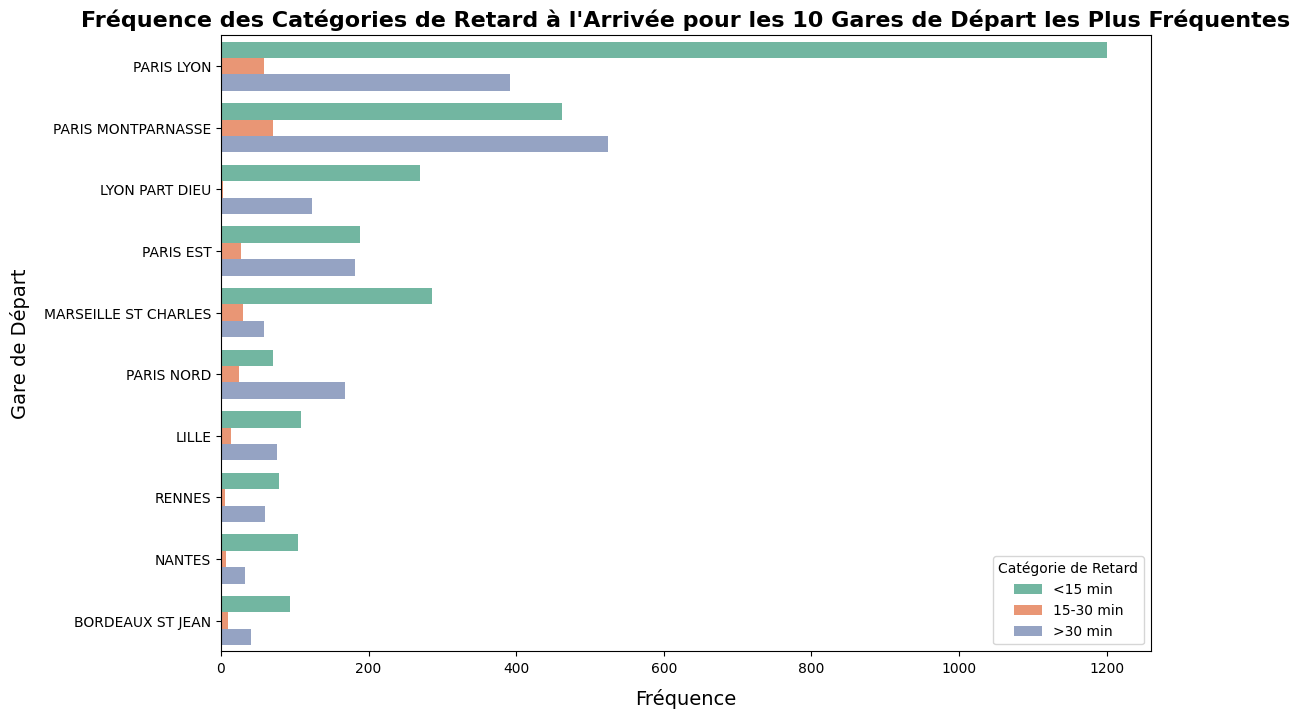

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacez 'votre_dataframe' par le nom de votre DataFrame
votre_dataframe = data

# Obtenir les 10 gares de départ les plus fréquentes
top_10_gares_depart = votre_dataframe['gare_depart'].value_counts().head(10).index

# Filtrer le DataFrame pour les 10 gares de départ les plus fréquentes
df_filtre = votre_dataframe[votre_dataframe['gare_depart'].isin(top_10_gares_depart)]

# Définir une fonction pour catégoriser les retards
def categoriser_retard(retard):
    if retard < 15:
        return '<15 min'
    elif retard < 30:
        return '15-30 min'
    else:
        return '>30 min'

# Appliquer la fonction de catégorisation pour créer une nouvelle colonne 'Catégorie de Retard'
df_filtre['Catégorie de Retard'] = df_filtre['retard_moyen_arrivee'].apply(categoriser_retard)

# Créer un graphique en barres horizontales pour visualiser la fréquence des catégories de retard
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2")
sns.countplot(data=df_filtre, y='gare_depart', hue='Catégorie de Retard', order=top_10_gares_depart, palette=palette)
plt.xlabel('Fréquence', fontsize=14, labelpad=10)
plt.ylabel('Gare de Départ', fontsize=14, labelpad=10)
plt.title('Fréquence des Catégories de Retard à l\'Arrivée pour les 10 Gares de Départ les Plus Fréquentes', fontsize=16, fontweight='bold')
plt.legend(title='Catégorie de Retard', labels=['<15 min', '15-30 min', '>30 min'])
plt.show()


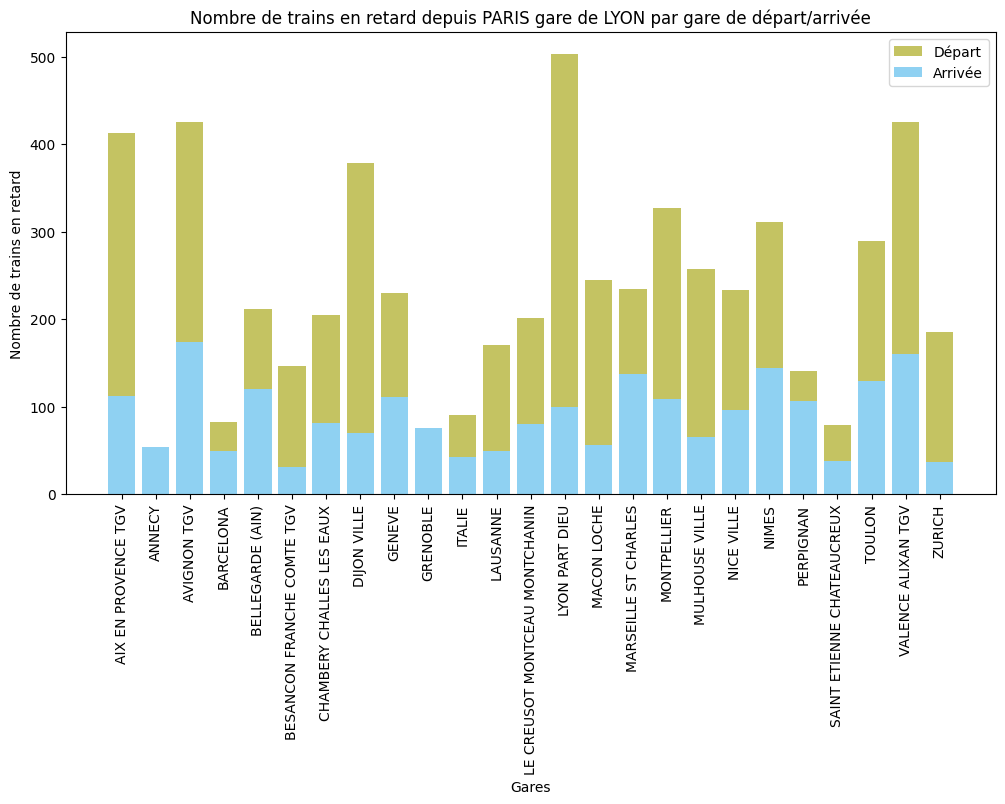

In [ ]:
# Filtrer les données pour Paris Gare de LYON (départ et arrivée)
paris_montparnasse_data_depart = data[data['gare_arrivee'] == 'PARIS LYON']
paris_montparnasse_data_arrivee = data[data['gare_depart'] == 'PARIS LYON']

# Trier les données pour les deux cas
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créer un graphique
plt.figure(figsize=(12, 6))

# Afficher les données de départ en bleu
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#C4C362', label='Départ')

# Afficher les données d'arrivée en vert
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'], color='#8FD1F2', label='Arrivée')

plt.xlabel('Gares')
plt.ylabel('Nombre de trains en retard')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS gare de LYON par gare de départ/arrivée')
plt.legend()  # Ajoutez une légende pour différencier les données de départ et d'arrivée

plt.show()

In [ ]:
from geopy.distance import great_circle

def calculer_distance(coord1, coord2):
    return great_circle(coord1, coord2).kilometers

In [ ]:
# Joignez les informations de gare pour la gare de départ
df_merged = data.merge(gares_info[['libelle', 'x_wgs84', 'y_wgs84']], left_on='gare_depart', right_on='libelle', how='left')
df_merged.rename(columns={'x_WGS84': 'Depart_Latitude', 'y_WGS84': 'Depart_Longitude'}, inplace=True)

# Joignez les informations de gare pour la gare d'arrivée
df_merged = df_merged.merge(gares_info[['libelle', 'x_wgs84', 'y_wgs84']], left_on='gare_arrivee', right_on='libelle', how='left')
df_merged.rename(columns={'w_wgs84': 'Arrivee_Latitude', 'y_wgs84': 'Arrivee_Longitude'}, inplace=True)
#calculer distance
df_merged['Distance_km'] = votre_dataframe.apply(
    lambda row: calculer_distance((row['Depart_Latitude'], row['Depart_Longitude']), (row['Arrivee_Latitude'], row['Arrivee_Longitude'])),
    axis=1
)

df_merged

In [ ]:
n = data.shape[0]
data.isnull().sum()*100/n

In [ ]:
#Info sur les types des données du dataset (float, int, object)
print(data.dtypes)

In [ ]:
#Info sur chaque colonne du dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [ ]:
#On convertit la colonne 'date' du DataFrame en un format de date spécifique (année-mois)
#en utilisant la fonction pd.to_datetime, et on crée une nouvelle colonne "année" pour faciliter le split
data['date'] = pd.to_datetime(data['date'])
data['annee'] = data['date'].dt.year
data

In [ ]:
data[data["prct_cause_infra"]==100].prct_cause_infra.count()
data[data["prct_cause_infra"]>50].prct_cause_infra.count()



305

In [ ]:
list(data.columns)

['date',
 'service',
 'gare_depart',
 'gare_arrivee',
 'duree_moyenne',
 'nb_train_prevu',
 'nb_annulation',
 'commentaire_annulation',
 'nb_train_depart_retard',
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'commentaire_retards_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee',
 'commentaires_retard_arrivee',
 'nb_train_retard_sup_15',
 'retard_moyen_trains_retard_sup15',
 'nb_train_retard_sup_30',
 'nb_train_retard_sup_60',
 'prct_cause_externe',
 'prct_cause_infra',
 'prct_cause_gestion_trafic',
 'prct_cause_materiel_roulant',
 'prct_cause_gestion_gare',
 'prct_cause_prise_en_charge_voyageurs',
 'Total Voyageurs annuel',
 'Total Voyageurs + non voyageurs annuel']

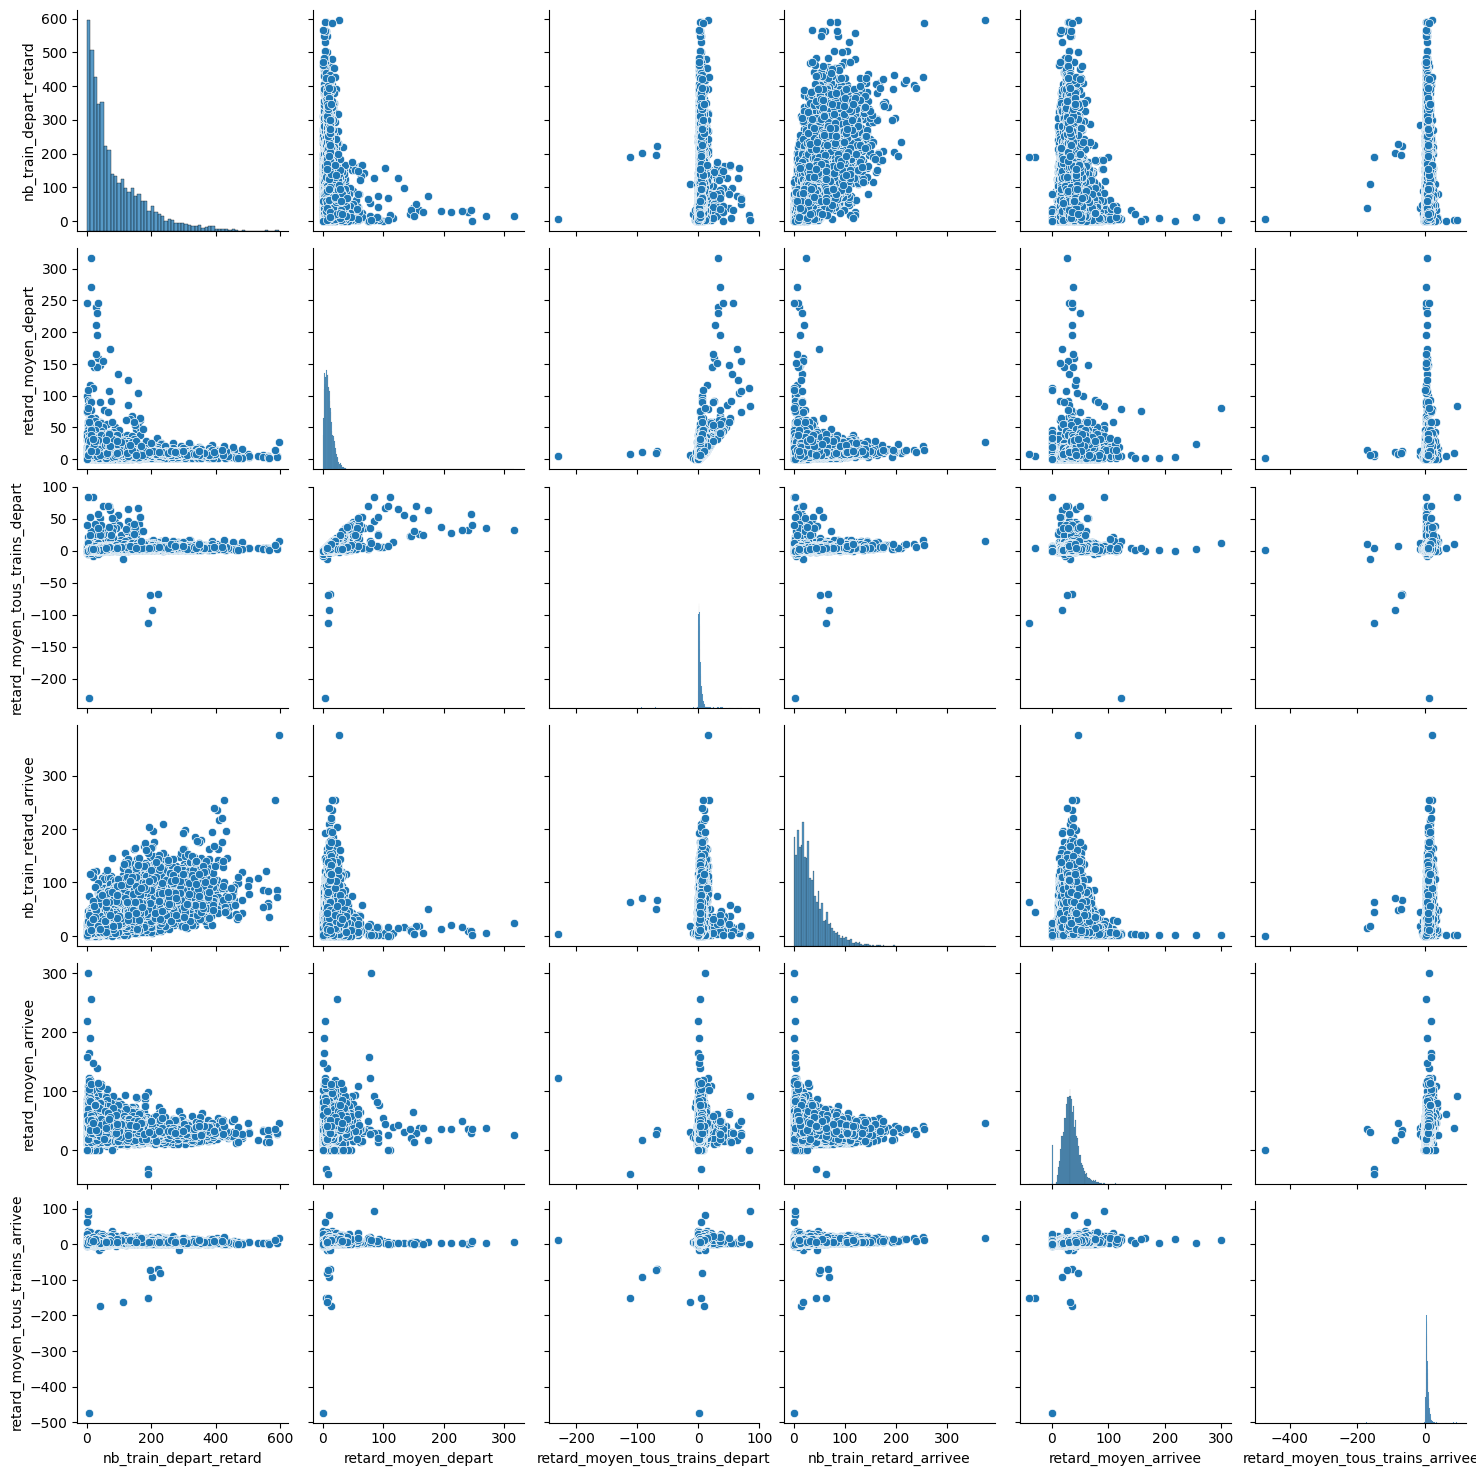

In [ ]:
sns.pairplot(data[[
 'nb_train_depart_retard',
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee',
]])

<Axes: xlabel='retard_moyen_arrivee', ylabel='retard_moyen_tous_trains_arrivee'>

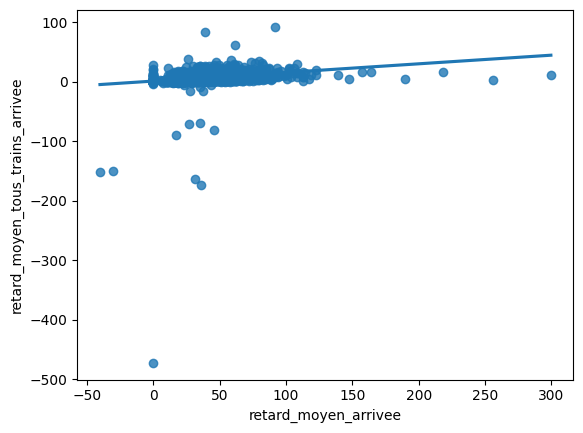

In [ ]:
sns.regplot(data=data, x="retard_moyen_arrivee", y="retard_moyen_tous_trains_arrivee", ci=None)

# Matrice de corrélation

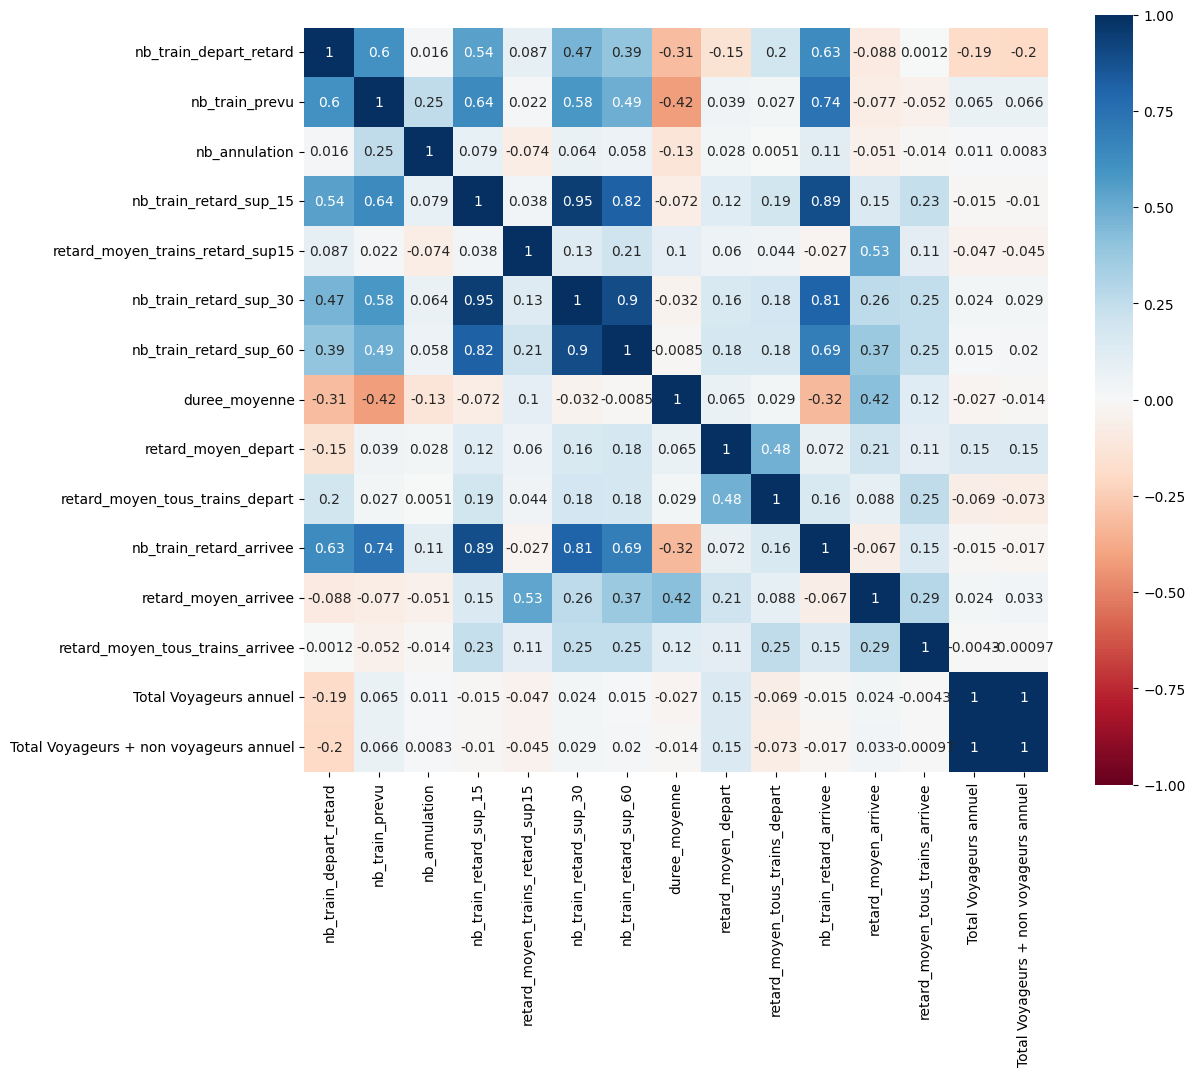

In [38]:
df=data[[
 'nb_train_depart_retard',
 "nb_train_prevu",
 'nb_annulation',
 "nb_train_retard_sup_15",
 "retard_moyen_trains_retard_sup15",
 "nb_train_retard_sup_30", 
 "nb_train_retard_sup_60",
 "duree_moyenne",
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee','Total Voyageurs annuel',
 'Total Voyageurs + non voyageurs annuel'
]]
plt.figure(figsize=(12, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
colormap = plt.cm.RdBu
heatmap = sns.heatmap(df.corr(), vmin=-1,square=True, cmap=colormap, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

On remarque que les 2 variables ajoutées sont fortement corrélées et que leur corrélationa vec notre target est de 0.017 ce qui est très faible, donc ces nouvelles données n'auront pas un très grand effet sur la précision des modèles de regression

In [26]:
merged_data.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs', 'Nombre Accidents',
       'Nombre de jours d'absences', 'TF mensuel',
       'TF annuel glissant 12 mois', 'TG mensuel',
       'TG annuel glissant 12 mois'],
      dtype='object')

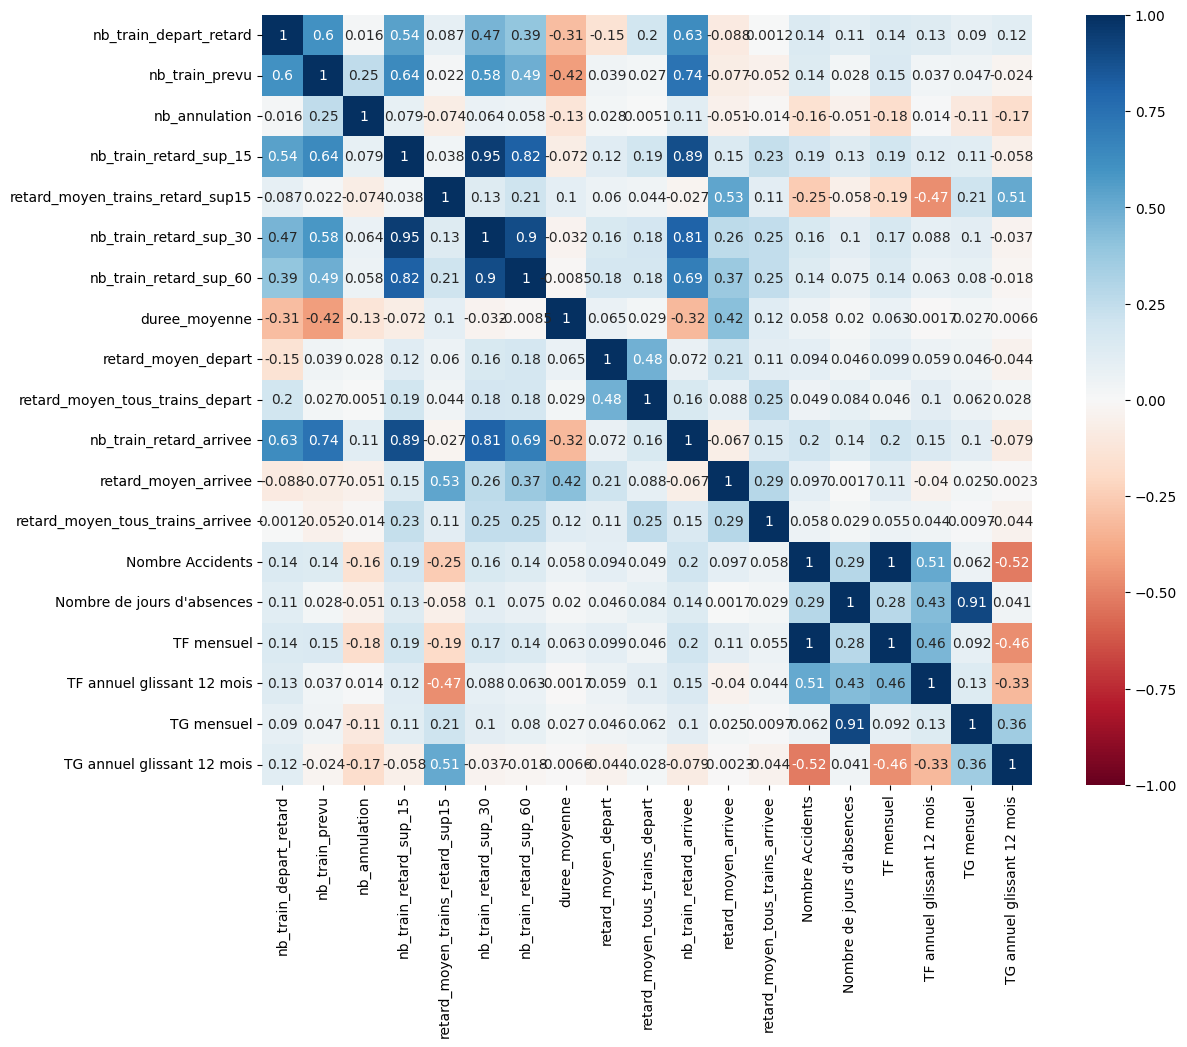

In [34]:
dfm=merged_data[[
 'nb_train_depart_retard',
 "nb_train_prevu",
 'nb_annulation',
 "nb_train_retard_sup_15",
 "retard_moyen_trains_retard_sup15",
 "nb_train_retard_sup_30", 
 "nb_train_retard_sup_60",
 "duree_moyenne",
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee', 'Nombre Accidents',
       "Nombre de jours d'absences", "TF mensuel",
       'TF annuel glissant 12 mois', 'TG mensuel',
       'TG annuel glissant 12 mois']
]
plt.figure(figsize=(14, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
colormap = plt.cm.RdBu
heatmap = sns.heatmap(dfm.corr(), vmin=-1,square=True, cmap=colormap, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

In [42]:
# Pour trouver les 10 meilleures corrélations avec la colonne retard_moyen_arrivee
top_correlations = df.corr().unstack().sort_values(ascending=False).drop_duplicates()
top_correlations = top_correlations[top_correlations != 1].head(10)

print("Top 10 Correlations (excluding self-correlation):")
print(top_correlations)


Top 10 Correlations (excluding self-correlation):
Total Voyageurs + non voyageurs annuel  Total Voyageurs annuel     0.998194
nb_train_retard_sup_15                  nb_train_retard_sup_30     0.945495
nb_train_retard_sup_60                  nb_train_retard_sup_30     0.896712
nb_train_retard_arrivee                 nb_train_retard_sup_15     0.886350
nb_train_retard_sup_15                  nb_train_retard_sup_60     0.819064
nb_train_retard_sup_30                  nb_train_retard_arrivee    0.808876
nb_train_retard_arrivee                 nb_train_prevu             0.739420
nb_train_retard_sup_60                  nb_train_retard_arrivee    0.689843
nb_train_prevu                          nb_train_retard_sup_15     0.635154
nb_train_depart_retard                  nb_train_retard_arrivee    0.632400
dtype: float64


In [51]:
# Pour trouver les 10 meilleures corrélations avec la colonne retard_moyen_arrivee
correlations_with_retard_arrivee = df.corr()['retard_moyen_arrivee'].sort_values(ascending=False)
top_correlations_with_retard_arrivee = correlations_with_retard_arrivee[correlations_with_retard_arrivee  != 1].head(11) 

print("Top 10 Correlations avec 'retard_moyen_arrivee':")
print(top_correlations_with_retard_arrivee)


Top 10 Correlations avec 'retard_moyen_arrivee':
retard_moyen_trains_retard_sup15          0.529987
duree_moyenne                             0.418651
nb_train_retard_sup_60                    0.371302
retard_moyen_tous_trains_arrivee          0.285933
nb_train_retard_sup_30                    0.260398
retard_moyen_depart                       0.208410
nb_train_retard_sup_15                    0.145277
retard_moyen_tous_trains_depart           0.087913
Total Voyageurs + non voyageurs annuel    0.032709
Total Voyageurs annuel                    0.024370
nb_annulation                            -0.050603
Name: retard_moyen_arrivee, dtype: float64


**Data scaling**

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#import pandas as pd

#data.head()
 
#scaler = MinMaxScaler()
 

## to set the plot size 
#plt.figure(figsize=(16, 8), dpi=150) 
  
## using plot method to plot open prices. 
## in plot method we set the label and color of the curve. 
#df=data[["retard_moyen_depart","retard_moyen_arrivee"]]
#dfa=df
#df.index = data['date'].dt.to_period('M')
#df_scaled = scaler.fit_transform(dfa.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns=["retard_moyen_depart","retard_moyen_arrivee"])
#df["retard_moyen_depart"]=df_scaled["retard_moyen_depart"]
#df["retard_moyen_arrivee"]=df_scaled["retard_moyen_arrivee"]
#df['retard_moyen_arrivee'].plot(label='arrive', color='orange') 
#df['retard_moyen_depart'].plot(label='dedpart') 

  
## adding title to the plot 
#plt.title('Visualization') 
  
## adding Label to the x-axis 
#plt.xlabel('Years') 

## adding legend to the curve 
#plt.legend()

In [52]:
#Infos sur le nombre de valeurs nulles (manquantes) dans le dataset
print(data[data["date"].dt.year < 2023].isnull().sum())


date                                        0
service                                     0
gare_depart                                 0
gare_arrivee                                0
duree_moyenne                               0
nb_train_prevu                              0
nb_annulation                               0
nb_train_depart_retard                      0
retard_moyen_depart                         0
retard_moyen_tous_trains_depart             0
nb_train_retard_arrivee                     0
retard_moyen_arrivee                        0
retard_moyen_tous_trains_arrivee            0
nb_train_retard_sup_15                      0
retard_moyen_trains_retard_sup15            0
nb_train_retard_sup_30                      0
nb_train_retard_sup_60                      0
prct_cause_externe                          0
prct_cause_infra                            0
prct_cause_gestion_trafic                   0
prct_cause_materiel_roulant                 0
prct_cause_gestion_gare           

In [ ]:
data.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [ ]:
data.retard_moyen_depart.describe()

count    8154.000000
mean       11.205745
std        12.476780
min         0.000000
25%         5.128410
50%         9.036447
75%        14.219375
max       316.188095
Name: retard_moyen_depart, dtype: float64

In [ ]:
df=data[data.retard_moyen_depart>80]
df[["retard_moyen_depart","retard_moyen_arrivee"]].sort_values(by="retard_moyen_arrivee", ascending=False)
df["difference"]=df.retard_moyen_arrivee-df.retard_moyen_depart
df[["retard_moyen_depart","retard_moyen_arrivee",'difference']].sort_values(by="retard_moyen_arrivee", ascending=False)


C:\Users\wwway\AppData\Local\Temp\ipykernel_24628\989629730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["difference"]=df.retard_moyen_arrivee-df.retard_moyen_depart


,retard_moyen_depart,retard_moyen_arrivee,difference
4306,84.516667,92.000000,7.483333
7692,89.615385,81.290196,-8.325189
1124,93.000000,76.983333,-16.016667
2114,148.767094,64.600000,-84.167094
538,99.200000,55.000000,-44.200000
2140,229.726111,50.497059,-179.229052
2153,103.524473,44.761111,-58.763361
2177,125.125459,42.738889,-82.386570
2000,116.554167,40.250000,-76.304167
2219,159.658081,38.316667,-121.341414


# Model Building

In [85]:
dataset = pd.read_csv("dataset_merged.csv")
dataset["date"]= pd.to_datetime(dataset["date"])
df = dataset[dataset["date"].dt.year < 2023]

In [ ]:

merged_data = pd.merge(dataset, infos_rf, on='date', how='inner')
merged_data.to_csv("merged_data.csv")

In [ ]:
merged_data['year'] = merged_data['date'].dt.year
merged_data['month'] = merged_data['date'].dt.month

# Drop the original 'date' column
df.drop('date', axis=1, inplace=True)
df.head()

In [38]:
df.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard',
       'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15',
       'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
       'Total Voyageurs annuel', 'Total Voyageurs + non voyageurs annuel'],
      dtype='object')

In [39]:
df.dropna(subset=["Total Voyageurs annuel"], inplace=True)
missing_values = df.isna().sum()
missing_values


date                                      0
service                                   0
gare_depart                               0
gare_arrivee                              0
duree_moyenne                             0
nb_train_prevu                            0
nb_annulation                             0
nb_train_depart_retard                    0
retard_moyen_depart                       0
retard_moyen_tous_trains_depart           0
nb_train_retard_arrivee                   0
retard_moyen_arrivee                      0
retard_moyen_tous_trains_arrivee          0
nb_train_retard_sup_15                    0
retard_moyen_trains_retard_sup15          0
nb_train_retard_sup_30                    0
nb_train_retard_sup_60                    0
prct_cause_externe                        0
prct_cause_infra                          0
prct_cause_gestion_trafic                 0
prct_cause_materiel_roulant               0
prct_cause_gestion_gare                   0
prct_cause_prise_en_charge_voyag

In [40]:
dummies = pd.get_dummies(df['service'], prefix='service')
df = pd.concat([df, dummies], axis=1)
df = df.drop('service', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6868 entries, 0 to 7427
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    6868 non-null   datetime64[ns]
 1   gare_depart                             6868 non-null   object        
 2   gare_arrivee                            6868 non-null   object        
 3   duree_moyenne                           6868 non-null   int64         
 4   nb_train_prevu                          6868 non-null   int64         
 5   nb_annulation                           6868 non-null   int64         
 6   nb_train_depart_retard                  6868 non-null   int64         
 7   retard_moyen_depart                     6868 non-null   float64       
 8   retard_moyen_tous_trains_depart         6868 non-null   float64       
 9   nb_train_retard_arrivee                 6868 non-null   i

In [17]:
# Frequency encoding des noms des gares
df['frequence_depart'] = df['gare_depart'].map(df['gare_depart'].value_counts())
df['frequence_arrivee'] = df['gare_arrivee'].map(df['gare_arrivee'].value_counts())

# Drop the original columns
df.drop(['gare_depart', 'gare_arrivee'], axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6868 entries, 0 to 7427
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    6868 non-null   datetime64[ns]
 1   gare_depart                             6868 non-null   object        
 2   gare_arrivee                            6868 non-null   object        
 3   duree_moyenne                           6868 non-null   int64         
 4   nb_train_prevu                          6868 non-null   int64         
 5   nb_annulation                           6868 non-null   int64         
 6   nb_train_depart_retard                  6868 non-null   int64         
 7   retard_moyen_depart                     6868 non-null   float64       
 8   retard_moyen_tous_trains_depart         6868 non-null   float64       
 9   nb_train_retard_arrivee                 6868 non-null   i

C:\Users\wwway\AppData\Local\Temp\ipykernel_2092\2046956928.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['retard_moyen_arrivee'],fit=norm)


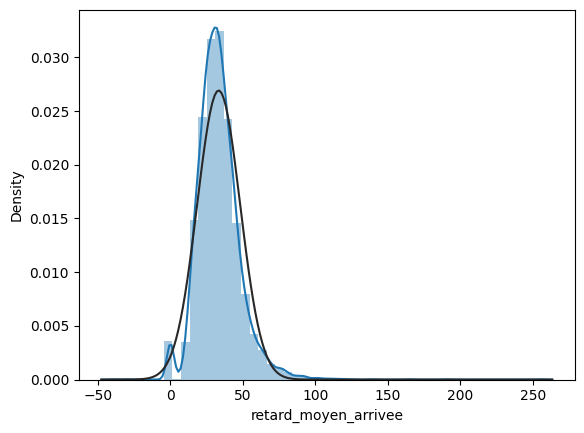

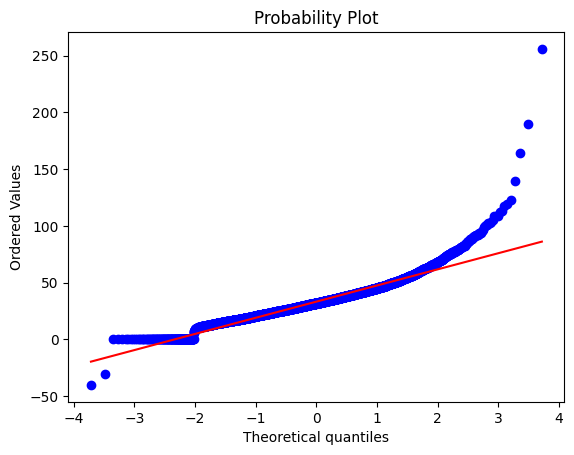

In [128]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['retard_moyen_arrivee'],fit=norm)
fig = plt.figure()
res = stats.probplot(df['retard_moyen_arrivee'], plot=plt)

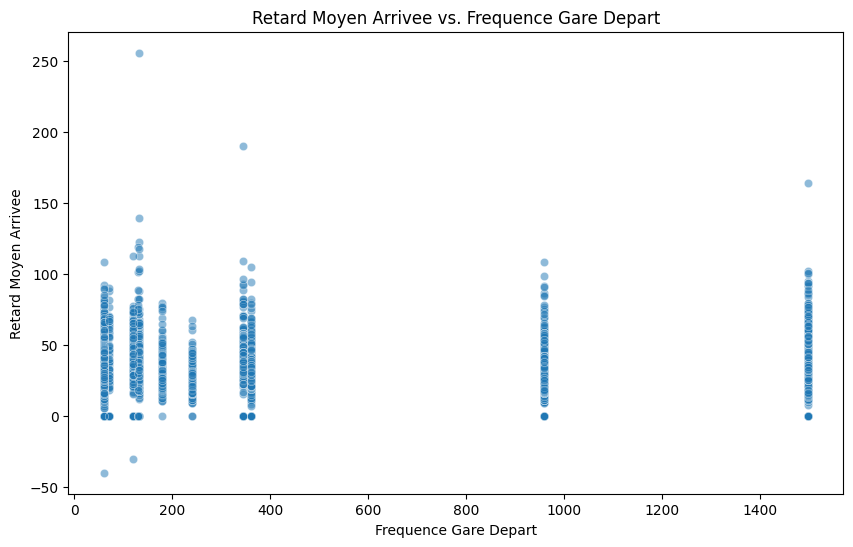

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='frequence_depart', y='retard_moyen_arrivee', alpha=0.5)

plt.title('Retard Moyen Arrivee vs. Frequence Gare Depart')
plt.xlabel('Frequence Gare Depart')
plt.ylabel('Retard Moyen Arrivee')

plt.show()


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop the original 'date' column
df.drop('date', axis=1, inplace=True)

# Random Forest


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop the original 'date' column
df.drop('date', axis=1, inplace=True)
# Define your features and target variable
features = df.drop(['retard_moyen_arrivee','prct_cause_externe',
 'prct_cause_infra',
 'prct_cause_gestion_trafic',
 'prct_cause_materiel_roulant',
 'prct_cause_gestion_gare',
 'prct_cause_prise_en_charge_voyageurs'], axis=1)  # Replace 'target_column' with the name of your target variable
target = df['retard_moyen_arrivee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"moyenne des retards : ", df["retard_moyen_arrivee"].mean())

In [28]:
df.columns

Index(['duree_moyenne', 'nb_train_prevu', 'nb_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee',
       'retard_moyen_arrivee', 'retard_moyen_tous_trains_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs', 'Total Voyageurs annuel',
       'Total Voyageurs + non voyageurs annuel', 'service_International',
       'service_National', 'frequence_depart', 'frequence_arrivee', 'year',
       'month'],
      dtype='object')

# One Hot Encoding

In [42]:
# Create dummy variables for 'gare_depart' and 'gare_arrivee'
df = pd.get_dummies(df, columns=['gare_depart', 'gare_arrivee'], prefix=['depart', 'arrivee'], drop_first=True)

In [45]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop the original 'date' column
df.drop('date', axis=1, inplace=True)
df.head()

,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,...,arrivee_STUTTGART,arrivee_TOULON,arrivee_TOULOUSE MATABIAU,arrivee_TOURCOING,arrivee_TOURS,arrivee_VALENCE ALIXAN TGV,arrivee_VANNES,arrivee_ZURICH,year,month
0,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,110,...,False,False,False,False,False,False,False,False,2018,1
1,165,222,0,8,2.875000,0.095796,34,21.524020,5.696096,22,...,False,False,False,False,False,False,False,False,2018,1
2,220,248,1,37,9.501351,1.003981,26,55.692308,7.578947,26,...,False,False,False,False,False,False,False,False,2018,1
3,156,102,0,12,19.912500,1.966667,13,48.623077,6.790686,8,...,False,False,False,False,False,False,False,False,2018,1
4,61,391,2,61,7.796995,0.886889,71,12.405164,3.346487,17,...,False,False,False,False,False,False,False,False,2018,1


Mean Squared Error: 25.78066205738476
R-squared: 0.883870958296052
moyenne des retards :  33.262942993114166
Feature: retard_moyen_trains_retard_sup15, Importance: 0.39553456150177657
Feature: duree_moyenne, Importance: 0.25639022765423225
Feature: nb_train_retard_sup_60, Importance: 0.12096084389813175
Feature: nb_train_retard_sup_15, Importance: 0.04996974786280968
Feature: nb_train_retard_arrivee, Importance: 0.03199581291046815
Feature: retard_moyen_tous_trains_arrivee, Importance: 0.021564463411802532
Feature: retard_moyen_depart, Importance: 0.016045648541373154
Feature: nb_train_prevu, Importance: 0.015125757011453921
Feature: nb_train_retard_sup_30, Importance: 0.01334612626921088
Feature: prct_cause_infra, Importance: 0.009292253502351739


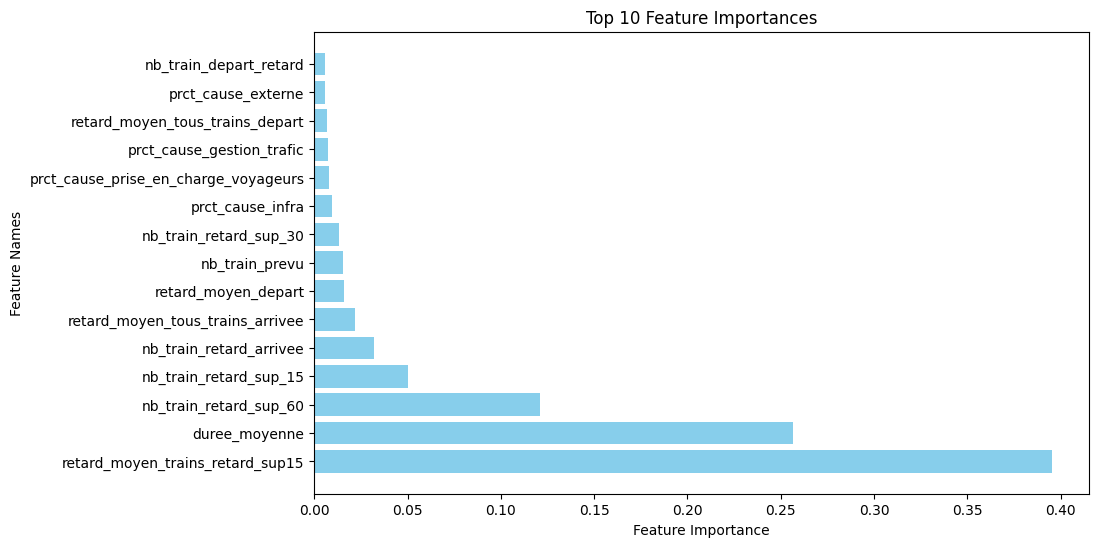

In [46]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your features and target variable
features = df.drop('retard_moyen_arrivee','nb_train_retard_sup_15',, axis=1)  # Replace 'target_column' with the name of your target variable
target = df['retard_moyen_arrivee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100,  random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"moyenne des retards : ", df["retard_moyen_arrivee"].mean())

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a list of feature names (assuming your columns are named)
feature_names = list(X_train.columns)

# Combine feature names and their importance scores
feature_importance = list(zip(feature_names, feature_importances))

# Sort features by importance in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 important features
top_10_features = feature_importance[:10]
for feature, importance in top_10_features:
    print(f"Feature: {feature}, Importance: {importance}")
    
import matplotlib.pyplot as plt

# Assuming you've already obtained feature_importances and feature_names
# from your machine learning model (as shown in the previous code).

# Sort features by importance in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Get the top 10 features and their importances
top_10_features = feature_importance[:15]
top_feature_names, top_importances = zip(*top_10_features)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 10 Feature Importances')

# Display the plot
plt.show()

On remarque que le retard_moyen_sup15 a une grande importance dans la prédiction de notre modèle. Cepeendant, ces données ne seraient pas disponible en cas réel, ce qui va entraîner une chute significative des performances des modèles de regression pour la prédiction du retard comme on va le voir dans un autre notebook où on a supprimer toutes les features dont on aura pas accès en cas réel de prédiction.

In [51]:
df.columns[:21
           ]

Index(['duree_moyenne', 'nb_train_prevu', 'nb_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee',
       'retard_moyen_arrivee', 'retard_moyen_tous_trains_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs', 'Total Voyageurs annuel',
       'Total Voyageurs + non voyageurs annuel'],
      dtype='object')

Mean Squared Error: 25.29113163614192
R-squared: 0.8860760490178233
moyenne des retards :  33.262942993114166
Feature: retard_moyen_trains_retard_sup15, Importance: 0.12188690155744553
Feature: arrivee_PARIS VAUGIRARD, Importance: 0.09663315117359161
Feature: nb_train_retard_sup_60, Importance: 0.09204447269439697
Feature: duree_moyenne, Importance: 0.07926979660987854
Feature: nb_train_retard_sup_15, Importance: 0.0324099175632
Feature: nb_train_retard_sup_30, Importance: 0.027928052470088005
Feature: depart_NIMES, Importance: 0.02728874795138836
Feature: arrivee_STRASBOURG, Importance: 0.025533946231007576
Feature: arrivee_PARIS MONTPARNASSE, Importance: 0.024524450302124023
Feature: arrivee_BARCELONA, Importance: 0.019160855561494827


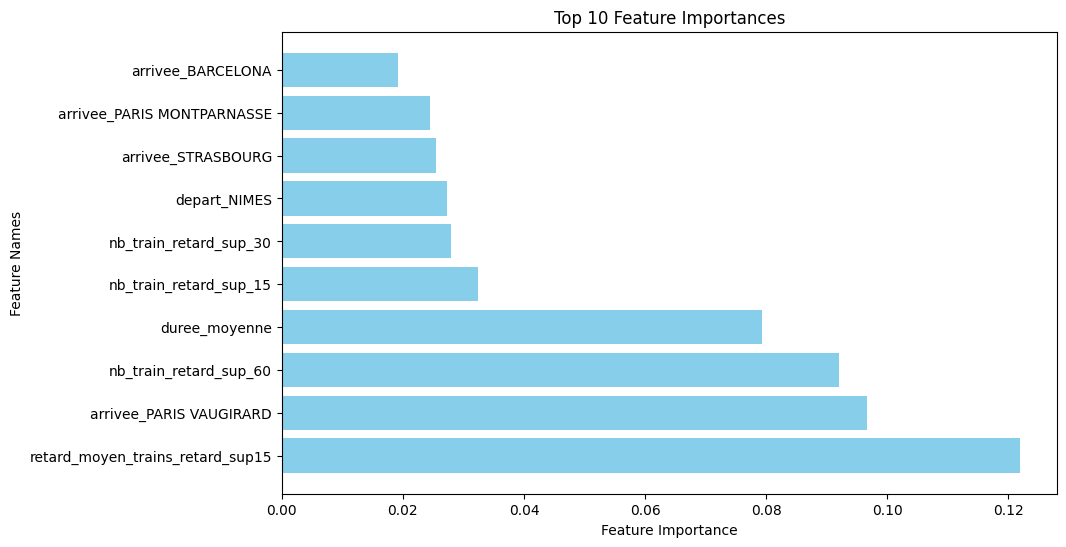

In [55]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your features and target variable
features = df.drop(['retard_moyen_arrivee','prct_cause_externe',
 'prct_cause_infra',
 'prct_cause_gestion_trafic',
 'prct_cause_materiel_roulant',
 'prct_cause_gestion_gare',
 'prct_cause_prise_en_charge_voyageurs', 'Total Voyageurs annuel',
 'Total Voyageurs + non voyageurs annuel','nb_train_depart_retard', 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee',
 'retard_moyen_tous_trains_arrivee'
       ], axis=1)   # Replace 'target_column' with the name of your target variable
target = df['retard_moyen_arrivee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"moyenne des retards : ", df["retard_moyen_arrivee"].mean())

# Get feature importances
feature_importances = xgb_regressor.feature_importances_

# Create a list of feature names (assuming your columns are named)
feature_names = list(X_train.columns)

# Combine feature names and their importance scores
feature_importance = list(zip(feature_names, feature_importances))

# Sort features by importance in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 important features
top_10_features = feature_importance[:10]
for feature, importance in top_10_features:
    print(f"Feature: {feature}, Importance: {importance}")

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
top_feature_names, top_importances = zip(*top_10_features)
plt.barh(top_feature_names, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 10 Feature Importances')
plt.show()

In [56]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your features and target variable
features = df.drop(['retard_moyen_arrivee','prct_cause_externe',
 'prct_cause_infra',
 'prct_cause_gestion_trafic',
 'prct_cause_materiel_roulant',
 'prct_cause_gestion_gare',
 'prct_cause_prise_en_charge_voyageurs'], axis=1) 
target = df['retard_moyen_arrivee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Adjust the number of trees
    'max_depth': [3, 4, 5],  # Adjust the maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
    'min_child_weight': [1, 2, 3],  # Adjust minimum sum of instance weight needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Adjust the fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0],  # Adjust the fraction of features used for training each tree
    'gamma': [0, 0.1, 0.2]  # Adjust the regularization parameter
    # Add more parameters as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Create a model with the best parameters
best_xgb_regressor = xgb.XGBRegressor(**best_params)

# Fit the model on the training data
best_xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"moyenne des retards : ", df["retard_moyen_arrivee"].mean())


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have your features (X) and target variable (y) ready in your DataFrame or numpy arrays

# Choose the number of neighbors (K) and create the KNN regressor
k = 4 # You can adjust the value of k
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='b', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


# Forecasting


In [90]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [101]:
dataset = pd.read_csv("merged_data.csv", index_col=0)
dataset["date"]= pd.to_datetime(dataset["date"])
df = dataset[dataset["date"].dt.year < 2023]

In [102]:
dataset = pd.read_csv("retard_ferie_vacation.csv")
dataset["date"]= pd.to_datetime(dataset["date"])
df = dataset[dataset["date"].dt.year < 2023]

In [ ]:
df.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard',
       'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15',
       'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
       'Total Voyageurs annuel', 'Total Voyageurs + non voyageurs annuel',
       'Nombre Accidents', 'Nombre de jours d'absences', 'TF mensuel',
       'TF annuel glissant 12 mois', 'TG mensuel',
       'TG annuel glissant 12 mois'],
      dtype='object')

In [19]:
ddf['retard_moyen_tous_trains_arrivee'].min()

-40.10925926

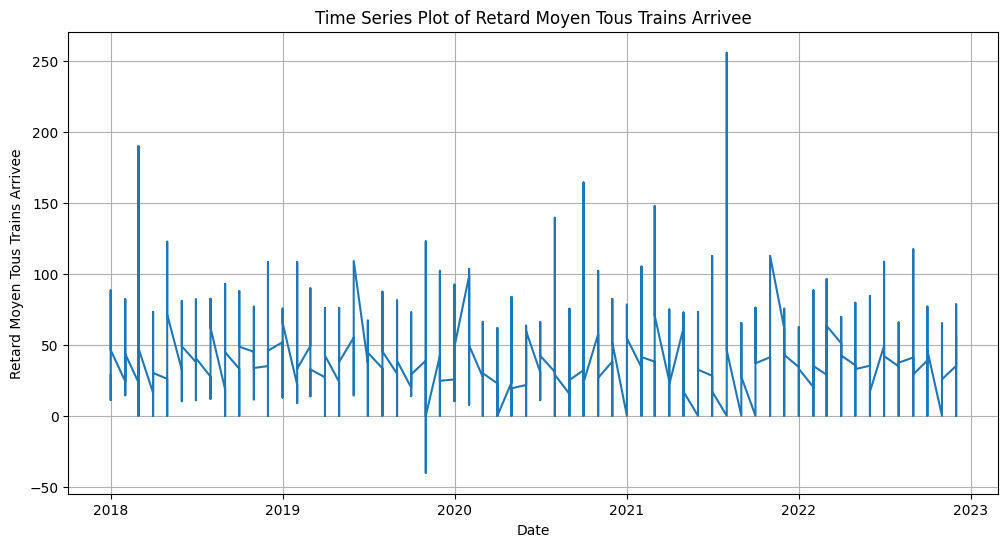

In [22]:
# Assuming 'date' is your date column and 'retard_moyen_tous_trains_arrivee' is the variable to forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['retard_moyen_tous_trains_arrivee'])
plt.title('Time Series Plot of Retard Moyen Tous Trains Arrivee')
plt.xlabel('Date')
plt.ylabel('Retard Moyen Tous Trains Arrivee')
plt.grid(True)
plt.show()


In [47]:

# Prepare the data for Prophet
fd = fd.rename(columns={"date": "ds", "retard_moyen_arrivee": "y"})

In [40]:
fd=pd.read_csv("retard_ferie_vacation.csv")
fd

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,annee,mois,nombre_jour_ferie,jours_vacances,total_jours,ratio_vacances
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,0.0,289,11.247809,...,10.924370,15.966387,5.042017,0.840336,2018,1,1.0,24.0,31.0,0.774194
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,0.0,8,2.875000,...,38.461538,11.538462,3.846154,0.000000,2018,1,1.0,24.0,31.0,0.774194
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,0.0,37,9.501351,...,15.384615,19.230769,0.000000,0.000000,2018,1,1.0,24.0,31.0,0.774194
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,0.0,12,19.912500,...,7.692308,15.384615,7.692308,0.000000,2018,1,1.0,24.0,31.0,0.774194
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,0.0,61,7.796995,...,9.090909,21.212121,6.060606,0.000000,2018,1,1.0,24.0,31.0,0.774194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,0.0,273,11.989927,...,55.238095,18.095238,7.619048,5.714286,2023,6,0.0,0.0,0.0,0.000000
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,0.0,24,28.730556,...,8.333333,19.444444,8.333333,16.666667,2023,6,0.0,0.0,0.0,0.000000
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,0.0,20,31.281667,...,28.571429,21.428571,3.571429,10.714286,2023,6,0.0,0.0,0.0,0.000000
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,0.0,347,13.517051,...,27.586207,7.758621,7.758621,10.344828,2023,6,0.0,0.0,0.0,0.000000


18:49:29 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing


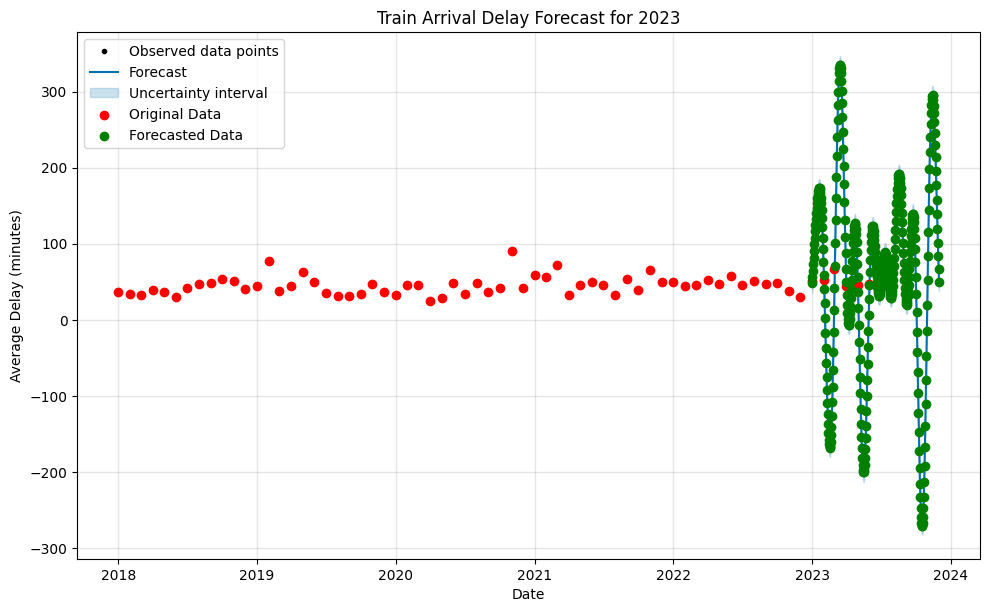

In [61]:

# Define your 'subset_df' as the most recurrent trajet
fd = subset_df


# Create a column 'ds' with a datetime format
fd['ds'] = pd.to_datetime(fd['ds'])

# Keep only the rows before 2023 for training
train_df = fd[fd['ds'].dt.year < 2023]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_df)

# Create a dataframe with future dates for forecasting (only for 2023)
future = model.make_future_dataframe(periods=365)  # Assuming you want to forecast for the entire year of 2023

# Make predictions for the future dates
forecast = model.predict(future)

# Filter the forecast for 2023
forecast_2023 = forecast[forecast['ds'].dt.year == 2023]

# Plot the forecast for 2023
fig = model.plot(forecast_2023)

# Customize the plot
plt.title("Train Arrival Delay Forecast for 2023")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")

# To show the forecasted data points, you can overlay them on the original data
plt.scatter(fd['ds'], fd['y'], color='red', label='Original Data', zorder=5)
plt.scatter(forecast_2023['ds'], forecast_2023['yhat'], color='green', label='Forecasted Data', zorder=5)

# Show the plot
plt.legend(loc='best')
plt.show()


La suite du travail de forecasting a été réalisée dans un autre notebook : Forecasting.ipynb